In [123]:
import pandas as pd
import numpy as np
import matplotlib as mtb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

In [3]:
df = pd.read_csv("globalterrorism.csv")

C:\Users\ragha\AppData\Local\Temp\ipykernel_6060\3552009747.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorism.csv")


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [6]:
df.shape

(181691, 135)

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [16]:
df1 = df[["eventid","iyear","imonth","iday","country_txt","region_txt","provstate",
          "city","location","summary","attacktype1_txt","targtype1_txt",
         "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

In [17]:
df1.head()

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1.970000e+11,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1.970000e+11,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1.970010e+11,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1.970010e+11,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1.970010e+11,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [22]:
df1.rename(columns = {"eventid":"Event ID","iyear":"Year","imonth":"Month","iday":"Day",
                     "country_txt":"Country","region_txt":"Region","provstate":"Province/State",
                     "city":"City","location":"Location","summary":"Summary","attacktype1_txt":"Attack Type",
                     "targtype1_txt":"Target Type","gname":"Gang Name","motive":"Motive",
                     "weaptype1_txt":"Weapon Type","nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace = True)

C:\Users\ragha\AppData\Local\Temp\ipykernel_6060\4222239653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns = {"eventid":"Event ID","iyear":"Year","imonth":"Month","iday":"Day",


In [23]:
df1.head()

,Event ID,Year,Month,Day,Country,Region,Province/State,City,Location,Summary,Attack Type,Target Type,Gang Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1.970000e+11,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1.970000e+11,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1.970010e+11,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1.970010e+11,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1.970010e+11,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event ID        181691 non-null  float64
 1   Year            181691 non-null  int64  
 2   Month           181691 non-null  int64  
 3   Day             181691 non-null  int64  
 4   Country         181691 non-null  object 
 5   Region          181691 non-null  object 
 6   Province/State  181270 non-null  object 
 7   City            181256 non-null  object 
 8   Location        55495 non-null   object 
 9   Summary         115562 non-null  object 
 10  Attack Type     181691 non-null  object 
 11  Target Type     181691 non-null  object 
 12  Gang Name       181691 non-null  object 
 13  Motive          50561 non-null   object 
 14  Weapon Type     181691 non-null  object 
 15  Killed          171378 non-null  float64
 16  Wounded         165380 non-null  float64
 17  Add Notes 

In [25]:
df1.describe()

,Event ID,Year,Month,Day,Killed,Wounded
count,1.816910e+05,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,2.403272,3.167662
std,1.325955e+09,13.259430,3.388303,8.814045,11.545741,35.949391
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1570.000000,8191.000000


### observations:

In [26]:
df1.isnull().sum()

Event ID               0
Year                   0
Month                  0
Day                    0
Country                0
Region                 0
Province/State       421
City                 435
Location          126196
Summary            66129
Attack Type            0
Target Type            0
Gang Name              0
Motive            131130
Weapon Type            0
Killed             10313
Wounded            16311
Add Notes         153402
dtype: int64

Data Vizualization

In [31]:
# 1. 
Total_events = df1["Event ID"].count()
Total_casualties = round(df1["Killed"].sum() + df1["Wounded"].sum())
print(f"Total Events- {Total_events}")
print(f"Total Casualties- {Total_casualties}")

Total Events- 181691
Total Casualties- 935736


In [57]:
# 2. Total events year wise
attacks = df1.groupby("Year").size()

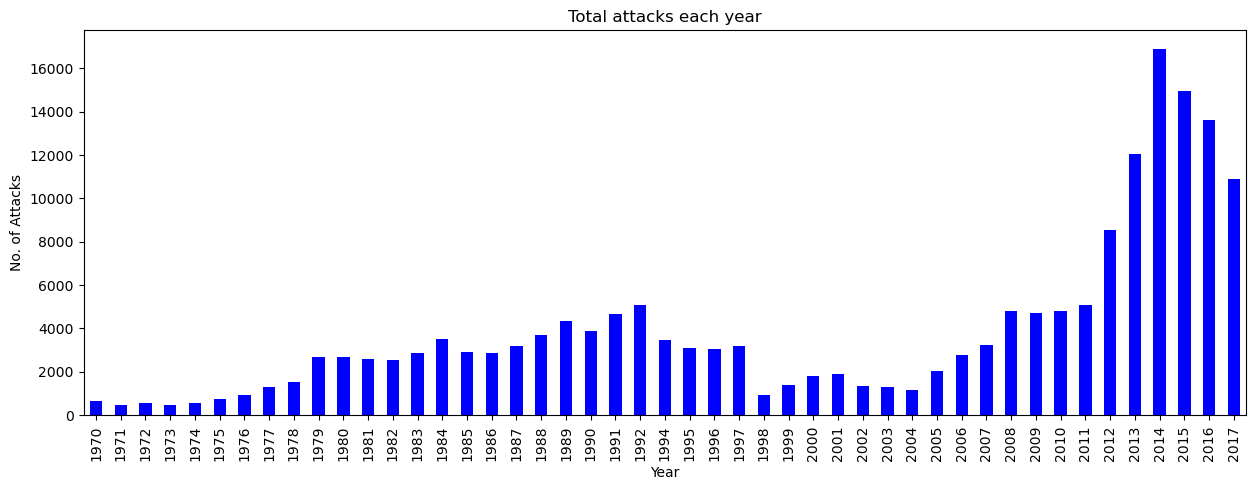

In [59]:
attacks.plot(kind = "bar",color = "blue", figsize=(15,5))
plt.title("Total attacks each year")
plt.xlabel("Year")
plt.ylabel("No. of Attacks")
plt.show()


In [87]:
# 3.Top 10 countries with the highest events count 
Country_wise_attacks = df1.groupby("Country").size()
top_10_countries = Country_wise_attacks.sort_values(ascending=False).head(10)

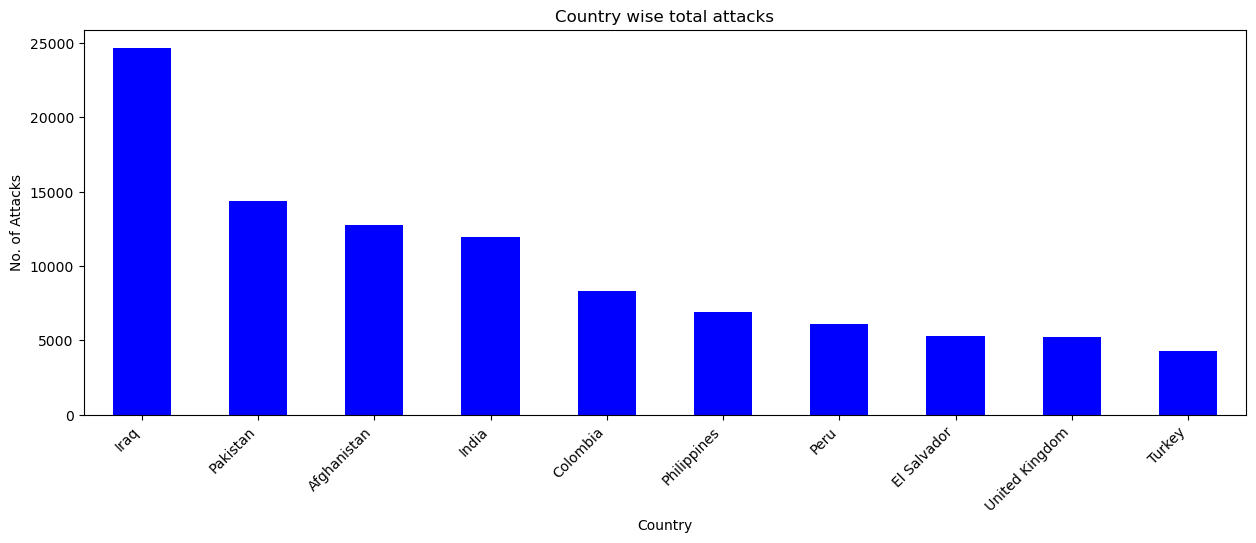

In [91]:
top_10_countries.plot(kind = "bar",color = "blue",figsize=(15,5))
plt.title("Country wise total attacks")
plt.xlabel("Country")
plt.ylabel("No. of Attacks")
plt.xticks(rotation = 45, ha = "right")
plt.show()

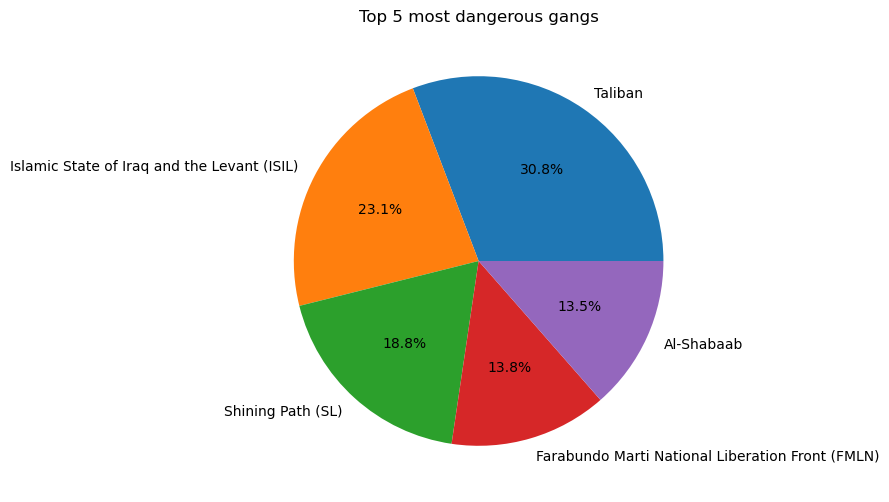

In [51]:
# 4.Top 5 most dangerous gangs
filter1 = df1[df1['Gang Name'] != 'Unknown']
top_gangs = filter1['Gang Name'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(top_gangs, labels=top_gangs.index, autopct='%1.1f%%')
plt.title('Top 5 most dangerous gangs')
plt.show()

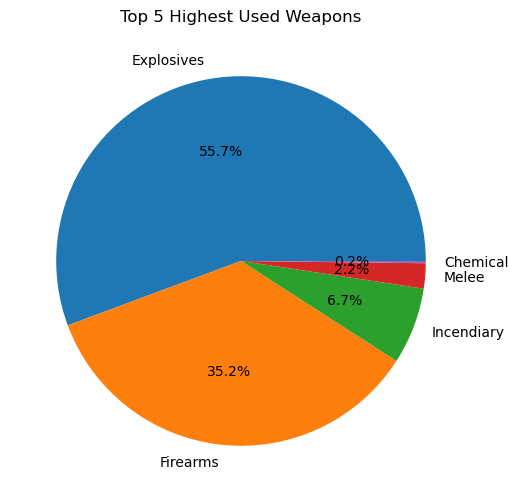

In [49]:
# 5.Most used weapons
filter2 = df1[df1['Weapon Type'] != 'Unknown']
top_weapons = filter2['Weapon Type'].value_counts().head(5)
plt.figure(figsize=(6,6))
plt.pie(top_weapons, labels=top_weapons.index, autopct='%1.1f%%')
plt.title('Top 5 Highest Used Weapons')
plt.show()

C:\Users\ragha\AppData\Local\Temp\ipykernel_6060\400132212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Total Casualties"] = df1['Killed']+ df1["Wounded"]
C:\Users\ragha\AppData\Local\Temp\ipykernel_6060\400132212.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(attack_type_counts.index, rotation=45, ha='right')


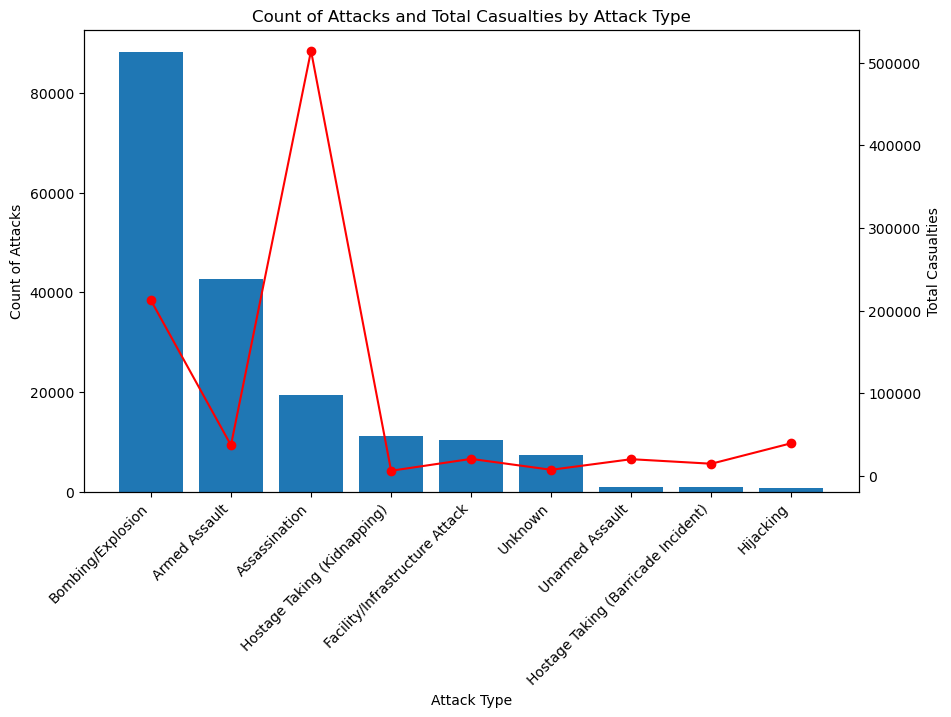

In [70]:
# 6. Attack Type and the damaged caused
df1["Total Casualties"] = df1['Killed']+ df1["Wounded"]
events_attack_type =  df1['Attack Type'].value_counts()
casualties_attack_type = df1.groupby('Attack Type')['Total Casualties'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(events_attack_type.index, events_attack_type)
ax1.set_xlabel('Attack Type')
ax1.set_ylabel('Count of Attacks')
ax1.set_xticklabels(attack_type_counts.index, rotation=45, ha='right')

ax2 = ax1.twinx()
color2 = 'red'
ax2.plot(casualties_attack_type.index, casualties_attack_type, marker='o', color=color2)
ax2.set_ylabel('Total Casualties')
plt.title('Count of Attacks and Total Casualties by Attack Type')
plt.show()


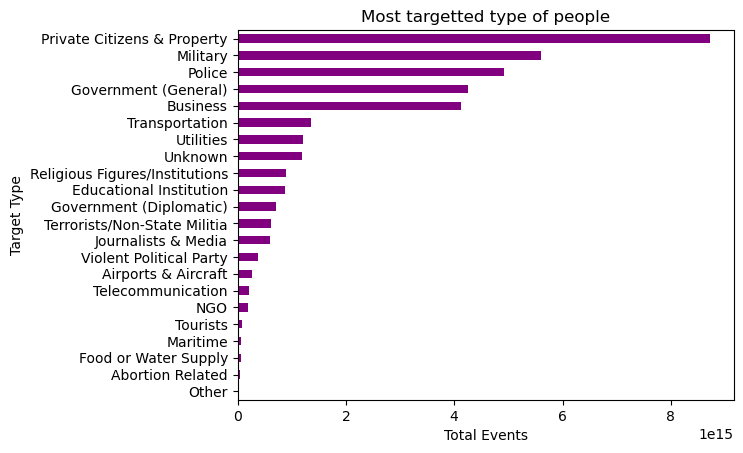

In [80]:
# 7. Most targetted type of people
most_targeted = df1.groupby("Target Type")["Event ID"].sum().sort_values()
most_targeted.plot(kind = "barh",color = "purple")
plt.xlabel("Total Events")
plt.title("Most targetted type of people")
plt.show()

In [97]:
# 8.Top 10 most peaceful countries
total_attacks_by_country = df1['Country'].value_counts()

# Sort the countries based on the total number of attacks in ascending order
most_peaceful = total_attacks_by_country.sort_values()

# Select the top 10 most peaceful countries
top_10_most_peaceful = most_peaceful.head(10)

print("Top 10 Most Peaceful Countries:")
print(top_10_most_peaceful)

Top 10 Most Peaceful Countries:
Country
Antigua and Barbuda    1
Vatican City           1
Falkland Islands       1
St. Lucia              1
North Korea            1
Andorra                1
International          1
South Vietnam          1
New Hebrides           1
Wallis and Futuna      1
Name: count, dtype: int64


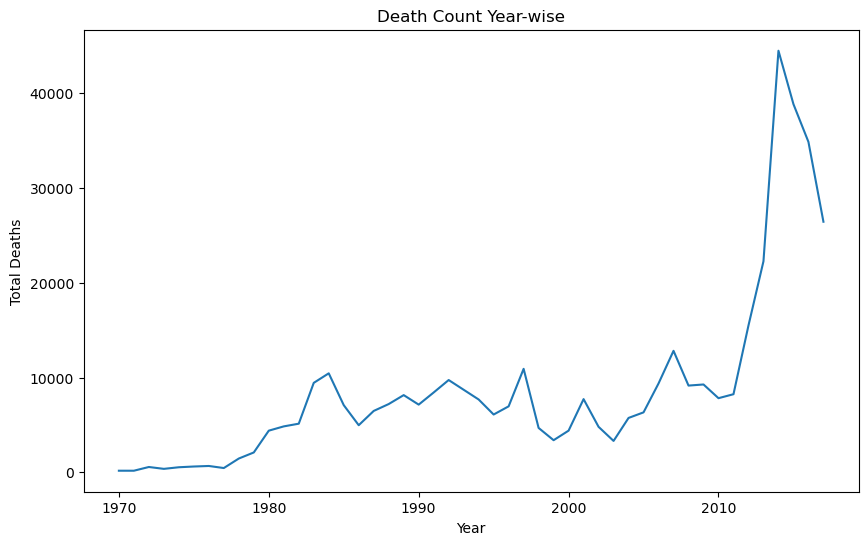

In [110]:
# 9. Death count year wise
deathss = df1.groupby("Year")["Killed"].sum()
plt.figure(figsize = (10,6))
plt.plot(deathss.index,deaths)
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.title('Death Count Year-wise')
plt.show()

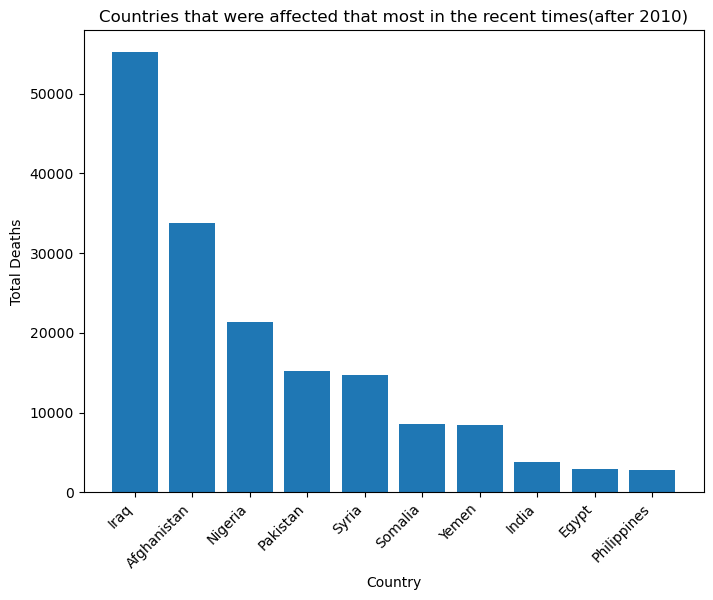

In [125]:
# 10. Countries that were affected that most in the recent times(after 2010)
after_2010 = df1[df1['Year']>=2010]
deaths_after_2010 = after_2010.groupby("Country")['Killed'].sum().sort_values(ascending = False)
deaths_after_2010 = deaths_after_2010.head(10)
plt.figure(figsize = (8,6))
plt.bar(deaths_after_2010.index,deaths_after_2010)
plt.xlabel("Country")
plt.ylabel("Total Deaths")
plt.xticks(rotation = 45,ha ="right")
plt.title("Countries that were affected that most in the recent times(after 2010)")
plt.show()
